In [1]:
#
# Create a classifier for artistic painting matching
# Train with CNN
# SIMPLEST IMPLEMENTATION to build on it 
# Evaluate the model with any other image, the classifier will tell the to which artists the 
# input art is more similar
# Conclusion
# Author: Luis A. Mateos

# pip install tensorflow-datasets
# pip install tensorflow --upgrade
# pip install scipy

import os
path_base = os.getcwd()
#'\home\\github\ml-classifier-no-common-sense\\'
path_dir = os.path.join(path_base+'/artists/')

'''artists = ["Sandro_Botticelli","Jacques-Louis_David","Leonardo_Da_Vinci",
          "Eugene_Delacroix","Jean-Honore_Fragonard","Jean_Auguste_Dominique_Ingres",
          "Gustav_Klimt","Michelangelo","Claude_Monet",
          "Edvard_Munch","Rembrandt","Pierre-Auguste_Renoir",
          "Jan_van_Eyck","Vincent_Van_Gogh","Diego_Velazquez",
          "Johannes_Vermeer"]
'''
artists = []
folders = os.listdir(path_dir)
artists = folders
print(folders)
print(len(folders))

train_folders = []

for i in folders:
    train_folders.append(path_dir + i + '/')
    
train_folder_files = [[]]
# initilize array
train_folder_files[0] = os.listdir(train_folders[0])

# fill array with list of files from each folder
for i in range(1,len(train_folders)):
    train_folder_files.append(os.listdir(train_folders[i]))
    
for i in range(len(train_folders)):
    # print directories with training images
    print(train_folders[i])
    # print filename from each directory
    print(train_folder_files[i][0])
    print(train_folder_files[i][1])
    # print total training images
    print("Total training zero images= ", len(os.listdir(train_folders[i])))
    print("----------------------------")
    if i == 2:
        break

num_classes = len(train_folders)

['Albrecht_Altdorfer', 'Alexandre_Cabanel', 'Amedeo_Modigliani', 'Antoine_Watteau', 'Camille_Pissarro', 'Caravaggio', 'Caspar_David_Friedrich', 'Cassius_Marcellus_Coolidge', 'Childe_Hassam', 'Claude_Monet', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Francisco_Goya', 'Francois_Boucher', 'Franz_Marc', 'Gilbert_Stuart', 'Grant_Wood', 'Gustav_Klimt', 'Hubert_Robert', 'Ivan_Aivazovsky', 'Jacques-Louis_David', 'Jean-Francois_Millet', 'Johannes_Vermeer', 'John_Constable', 'Joseph_Mallord_William_Turner', 'Katsushika_Hokusai', 'Leonardo_Da_Vinci', 'Mary_Cassatt', 'Michelangelo', 'Paul_Cezanne', 'Paul_Klee', 'Pierre-Auguste_Renoir', 'Pieter_Bruegel_The_Elder', 'Raphael', 'Rembrandt', 'Sandro_Botticelli', 'Thomas_Gainsborough', 'Vincent_Van_Gogh', 'Wassily_Kandinsky', 'Wladyslaw_Podkowinski']
43
C:\Users\Josh\Documents\AIartist/artists/Albrecht_Altdorfer/
ascension-christ.jpg!Large.jpg
Battle_Of_Issus_by_Albrecht_Altdorfer_E1.jpg
Total training zero images=  

In [2]:
path_dir_eval = os.path.join(path_base+'/artists_eval/')

'''artists = ["Sandro_Botticelli","Jacques-Louis_David","Leonardo_Da_Vinci",
          "Eugene_Delacroix","Jean-Honore_Fragonard","Jean_Auguste_Dominique_Ingres",
          "Gustav_Klimt","Michelangelo","Claude_Monet",
          "Edvard_Munch","Rembrandt","Pierre-Auguste_Renoir",
          "Jan_van_Eyck","Vincent_Van_Gogh","Diego_Velazquez",
          "Johannes_Vermeer"]
'''
artists_eval = []
folders_eval = os.listdir(path_dir_eval)
artists_eval = folders_eval
print(folders_eval)
print(len(folders_eval))

train_folders_eval = []

for i in folders_eval:
    train_folders_eval.append(path_dir_eval + i + '/')
    
train_folder_files_eval = [[]]
# initilize array
train_folder_files_eval[0] = os.listdir(train_folders_eval[0])

# fill array with list of files from each folder
for i in range(1,len(train_folders_eval)):
    train_folder_files_eval.append(os.listdir(train_folders_eval[i]))
    
for i in range(len(train_folders_eval)):
    # print directories with training images
    print(train_folders_eval[i])
    # print filename from each directory
    print(train_folder_files_eval[i][0])
    print(train_folder_files_eval[i][1])
    # print total training images
    print("Total _eval zero images= ", len(os.listdir(train_folders_eval[i])))
    print("----------------------------")
    if i == 2:
        break

num_classes_eval = len(train_folders_eval)

['Albrecht_Altdorfer', 'Alexandre_Cabanel', 'Amedeo_Modigliani', 'Antoine_Watteau', 'Camille_Pissarro', 'Caravaggio', 'Caspar_David_Friedrich', 'Cassius_Marcellus_Coolidge', 'Childe_Hassam', 'Claude_Monet', 'Diego_Velazquez', 'Edgar_Degas', 'Edouard_Manet', 'Edvard_Munch', 'El_Greco', 'Francisco_Goya', 'Francois_Boucher', 'Franz_Marc', 'Gilbert_Stuart', 'Grant_Wood', 'Gustav_Klimt', 'Hubert_Robert', 'Ivan_Aivazovsky', 'Jacques-Louis_David', 'Jean-Francois_Millet', 'Johannes_Vermeer', 'John_Constable', 'Joseph_Mallord_William_Turner', 'Katsushika_Hokusai', 'Leonardo_Da_Vinci', 'Mary_Cassatt', 'Michelangelo', 'Paul_Cezanne', 'Paul_Klee', 'Pierre-Auguste_Renoir', 'Pieter_Bruegel_The_Elder', 'Raphael', 'Rembrandt', 'Sandro_Botticelli', 'Thomas_Gainsborough', 'Vincent_Van_Gogh', 'Wassily_Kandinsky', 'Wladyslaw_Podkowinski']
43
C:\Users\Josh\Documents\AIartist/artists_eval/Albrecht_Altdorfer/
ascension-christ.jpg!Large.jpg
Battle_Of_Issus_by_Albrecht_Altdorfer_E1.jpg
Total _eval zero images=

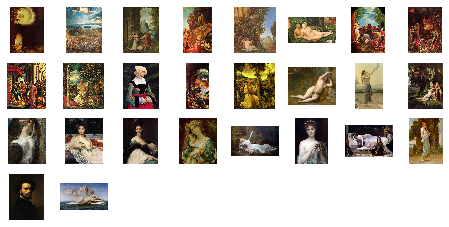

In [3]:
#
# Visualize some of the training images
#
%matplotlib inline
import matplotlib.pyplot as plt
import matplotlib.image as mpimg   

nrows, ncols = 8,8
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 16
next_zero_pix = [os.path.join(train_folders[0], fname)
                for fname in train_folder_files[0][pic_index-16:pic_index]]
next_one_pix = [os.path.join(train_folders[1], fname)
                for fname in train_folder_files[1][pic_index-16:pic_index]]

for i, img_path in enumerate(next_zero_pix + next_one_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')
    
plt.show()

In [4]:
#
# CNN
#
import tensorflow as tf
print(tf.__version__)

model = tf.keras.models.Sequential([tf.keras.layers.Conv2D(64, (3,3), activation='relu',input_shape=(28, 28, 3)),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Conv2D(64, (3,3), activation='relu'),
                                   tf.keras.layers.MaxPool2D(2,2),
                                   tf.keras.layers.Flatten(),
                                   tf.keras.layers.Dense(64, activation='relu'),
                                   tf.keras.layers.Dense(128, activation='relu'),
                                   tf.keras.layers.Dense(64, activation='relu'),
                                   tf.keras.layers.Dense(num_classes, activation='softmax')
                                   ])

model.compile(optimizer='adam',
             loss='categorical_crossentropy',
             metrics=['accuracy']
             )

2.5.0


In [5]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

train_datagen = ImageDataGenerator(rescale=1/255)

train_generator = train_datagen.flow_from_directory(path_base+'/artists/',
                                                    target_size=(28,28),
                                                    batch_size=64,
                                                    class_mode='categorical')
train_generator_eval = train_datagen.flow_from_directory(path_base+'/artists_eval/',
                                                    target_size=(28,28),
                                                    batch_size=64,
                                                    class_mode='categorical')
#class_mode='categorical')
#class_mode='sparse')

Found 1157 images belonging to 43 classes.
Found 2006 images belonging to 43 classes.


In [6]:
history = model.fit(train_generator,
                   steps_per_epoch=8,
                   epochs=180,
                   validation_data=(train_generator_eval), verbose=2)

Epoch 1/180
8/8 - 5s - loss: 3.7432 - accuracy: 0.0547 - val_loss: 3.7384 - val_accuracy: 0.0404
Epoch 2/180
8/8 - 5s - loss: 3.6887 - accuracy: 0.0762 - val_loss: 3.7557 - val_accuracy: 0.0404
Epoch 3/180
8/8 - 5s - loss: 3.6725 - accuracy: 0.0728 - val_loss: 3.7394 - val_accuracy: 0.0404
Epoch 4/180
8/8 - 5s - loss: 3.6246 - accuracy: 0.0723 - val_loss: 3.7451 - val_accuracy: 0.0404
Epoch 5/180
8/8 - 5s - loss: 3.5944 - accuracy: 0.0723 - val_loss: 3.7348 - val_accuracy: 0.0404
Epoch 6/180
8/8 - 5s - loss: 3.5728 - accuracy: 0.0574 - val_loss: 3.6500 - val_accuracy: 0.0459
Epoch 7/180
8/8 - 5s - loss: 3.4805 - accuracy: 0.0879 - val_loss: 3.6295 - val_accuracy: 0.0553
Epoch 8/180
8/8 - 5s - loss: 3.4262 - accuracy: 0.1035 - val_loss: 3.6406 - val_accuracy: 0.0518
Epoch 9/180
8/8 - 5s - loss: 3.3959 - accuracy: 0.1015 - val_loss: 3.5634 - val_accuracy: 0.0753
Epoch 10/180
8/8 - 5s - loss: 3.4054 - accuracy: 0.0927 - val_loss: 3.5398 - val_accuracy: 0.0837
Epoch 11/180
8/8 - 5s - loss:

Epoch 85/180
8/8 - 5s - loss: 0.9852 - accuracy: 0.6895 - val_loss: 3.1677 - val_accuracy: 0.4626
Epoch 86/180
8/8 - 5s - loss: 0.8781 - accuracy: 0.7439 - val_loss: 2.9021 - val_accuracy: 0.4741
Epoch 87/180
8/8 - 5s - loss: 0.7933 - accuracy: 0.7695 - val_loss: 2.8138 - val_accuracy: 0.5264
Epoch 88/180
8/8 - 5s - loss: 0.6780 - accuracy: 0.8066 - val_loss: 2.8779 - val_accuracy: 0.5364
Epoch 89/180
8/8 - 5s - loss: 0.6368 - accuracy: 0.8234 - val_loss: 3.0487 - val_accuracy: 0.5015
Epoch 90/180
8/8 - 5s - loss: 0.7173 - accuracy: 0.7852 - val_loss: 2.9477 - val_accuracy: 0.5189
Epoch 91/180
8/8 - 5s - loss: 0.6486 - accuracy: 0.8027 - val_loss: 2.9567 - val_accuracy: 0.5439
Epoch 92/180
8/8 - 5s - loss: 0.5721 - accuracy: 0.8633 - val_loss: 2.9198 - val_accuracy: 0.5429
Epoch 93/180
8/8 - 5s - loss: 0.5272 - accuracy: 0.8555 - val_loss: 3.0320 - val_accuracy: 0.5528
Epoch 94/180
8/8 - 5s - loss: 0.4559 - accuracy: 0.8770 - val_loss: 3.0659 - val_accuracy: 0.5563
Epoch 95/180
8/8 - 5

Epoch 168/180
8/8 - 5s - loss: 0.0139 - accuracy: 1.0000 - val_loss: 5.1147 - val_accuracy: 0.6231
Epoch 169/180
8/8 - 5s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 5.1350 - val_accuracy: 0.6231
Epoch 170/180
8/8 - 5s - loss: 0.0129 - accuracy: 1.0000 - val_loss: 5.1803 - val_accuracy: 0.6216
Epoch 171/180
8/8 - 5s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 5.1926 - val_accuracy: 0.6241
Epoch 172/180
8/8 - 5s - loss: 0.0112 - accuracy: 1.0000 - val_loss: 5.2465 - val_accuracy: 0.6226
Epoch 173/180
8/8 - 5s - loss: 0.0108 - accuracy: 1.0000 - val_loss: 5.1927 - val_accuracy: 0.6241
Epoch 174/180
8/8 - 5s - loss: 0.0122 - accuracy: 1.0000 - val_loss: 5.2305 - val_accuracy: 0.6231
Epoch 175/180
8/8 - 5s - loss: 0.0116 - accuracy: 1.0000 - val_loss: 5.2498 - val_accuracy: 0.6236
Epoch 176/180
8/8 - 5s - loss: 0.0115 - accuracy: 1.0000 - val_loss: 5.3401 - val_accuracy: 0.6226
Epoch 177/180
8/8 - 5s - loss: 0.0113 - accuracy: 1.0000 - val_loss: 5.3056 - val_accuracy: 0.6251
Epoch 178/

In [7]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8

In [9]:
#last_layer = model.get_layer('mixed7')
#print('last layer output shape: ', last_layer.output_shape)

In [10]:
#
# Helper functions for plotting
#
import numpy as np
import os
import matplotlib.image as mpimg

from tensorflow.keras.preprocessing import image


[5.86578075e-09 4.02469273e-11 1.97651750e-13 4.32174539e-11
 1.67368647e-10 1.75225019e-24 5.76370242e-21 8.61953941e-19
 8.43028445e-03 9.53245651e-17 5.98379206e-23 4.51779236e-09
 7.92789098e-11 2.50900399e-07 1.17324358e-20 2.16790709e-29
 3.41652048e-22 9.91415799e-01 1.62729665e-36 3.91096080e-07
 1.01952349e-10 6.93372383e-16 1.57272832e-23 4.86197027e-30
 6.96190059e-15 1.14182153e-24 2.45203341e-18 4.25995834e-25
 1.18611555e-04 7.99012043e-21 4.76555521e-20 5.06422959e-11
 4.28245426e-20 3.74338093e-13 1.15771468e-06 1.54964878e-11
 2.08116893e-14 2.32705060e-28 2.46231375e-05 3.68806043e-35
 1.92838843e-06 7.02183752e-06 3.32439701e-11]
0.9914158
Franz_Marc
17


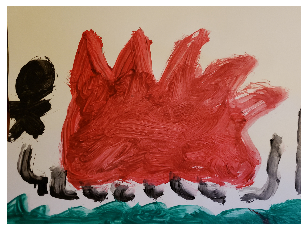

In [11]:
#
# 
#
path_dir = os.path.join(path_base+'/')

#path = train_folders[0] + train_folder_files[0][0] 
path = path_dir + "20200911_204901.jpg" 

img = mpimg.imread(path)
plt.axis("off")
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
x = np.expand_dims(x, axis=0)

#images = np.vstack([x])
classes = model.predict(x)

print(classes[0])
print(max(classes[0]))
i=0
for x in classes[0]:
    if max(classes[0]) == x:
        print(artists[i])
        print(i)
        break
    i+=1

Your piece of art has a touch of Edgar_Degas, style of Wladyslaw_Podkowinski and similar to Wassily_Kandinsky


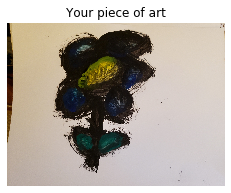

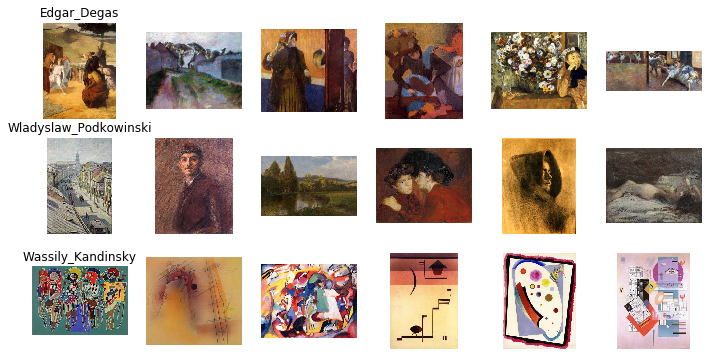

In [12]:
#
# 
#
path_dir = os.path.join(path_base+'/')

#path = train_folders[0] + train_folder_files[0][0] 
path = path_dir + "20200911_204901.jpg" 
path = path_dir + "20200911_210346.jpg" 

img = mpimg.imread(path)
plt.axis("off")
plt.gca().set_title('Your piece of art')
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
#print(x.shape)
x = np.expand_dims(x, axis=0)
#print(x.shape)

classes = model.predict(x)

#print(classes[0])
#print(max(classes[0]))
#i=0
#for x in classes[0]:
#    if max(classes[0]) == x:
#        print(artists[i])
#        print(i)
#        break
#    i+=1
    
d=dict()
i=0
for x in classes[0]:
    d.setdefault(x,i)
    i+=1
    
#print(d)

art = []
arti=[]
i=0
for k, v in sorted(d.items(),reverse=True):
    #print('---------', k, 'in', v)
    #print(artists[v])
    art.append(artists[v])
    arti.append(v)
    i+=1
    if i>3:
        break
        
print(f"Your piece of art has a touch of {art[0]}, style of {art[1]} and similar to {art[2]}")

nrows, ncols = 3,6
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 6
next_zero_pix = [os.path.join(train_folders[arti[0]], fname)
                for fname in train_folder_files[arti[0]][pic_index-6:pic_index]]
next_one_pix = [os.path.join(train_folders[arti[1]], fname)
                for fname in train_folder_files[arti[1]][pic_index-6:pic_index]]
next_two_pix = [os.path.join(train_folders[arti[2]], fname)
                for fname in train_folder_files[arti[2]][pic_index-6:pic_index]]


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
plt.gca().set_title('title')
ax1.title.set_text('First Plot')
ax2.title.set_text('2First Plot')
ax3.title.set_text('3First Plot')
ax4.title.set_text('4 Plot')

axes = [ax1, ax2, ax3, ax4]

for i, img_path in enumerate(next_zero_pix + next_one_pix + next_two_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    if i==0:
        plt.gca().set_title(art[0])
    if i==6:
        plt.gca().set_title(art[1])
    if i==12:
        plt.gca().set_title(art[2])
        
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')

plt.show()

Your piece of art has a touch of Vincent_Van_Gogh, style of Edvard_Munch and similar to Wassily_Kandinsky


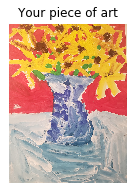

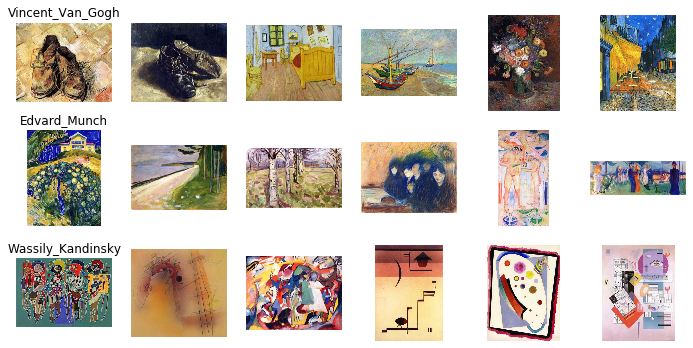

In [13]:

# 
#
path_dir = os.path.join(path_base+'/')
path_dir2 = os.path.join(path_base+'/artists2/')
#path = train_folders[0] + train_folder_files[0][0] 
path = path_dir2 + "The_Starry_Night_by_Vincent_Van_Gogh.jpg" 
#path = path_dir2 + "Cottage_With_Peasant_Woman_Digging_by_Vincent_Van_Gogh_V77.jpg" 
#path = path_dir2 + "Entrance_To_A_Quarry_by_Vincent_Van_Gogh_H54.jpg" 
#path = path_dir2 + "Farmhouse_In_A_Wheat_Field_by_Vincent_Van_Gogh_Q33.jpg" 
#path = path_dir2 + "Portrait_Of_The_Artists_Mother_by_Vincent_Van_Gogh_V43.jpg" 
#path = path_dir2 + "Heath_With_Wheelbarrows_by_Vincent_Van_Gogh_L84.jpg" #
#path = path_dir + "20200911_204901.jpg" 
#path = path_dir + "20200911_210346.jpg" 
path = path_dir + "20220903_162317.jpg" 
#path = path_dir + "20220903_162609.jpg" 
#path = path_dir + "20220903_162245.jpg" 


img = mpimg.imread(path)
plt.axis("off")
plt.gca().set_title('Your piece of art')
plt.imshow(img)

img = image.load_img(path, target_size=(28,28))
x = image.img_to_array(img)
x = x/255.0
#print(x.shape)
x = np.expand_dims(x, axis=0)
#print(x.shape)

classes = model.predict(x)

#print(classes[0])
#print(max(classes[0]))
#i=0
#for x in classes[0]:
#    if max(classes[0]) == x:
#        print(artists[i])
#        print(i)
#        break
#    i+=1
    
d=dict()
i=0
for x in classes[0]:
    d.setdefault(x,i)
    i+=1
    
#print(d)

art = []
arti=[]
i=0
for k, v in sorted(d.items(),reverse=True):
    #print('---------', k, 'in', v)
    #print(artists[v])
    art.append(artists[v])
    arti.append(v)
    i+=1
    if i>3:
        break
        
print(f"Your piece of art has a touch of {art[0]}, style of {art[1]} and similar to {art[2]}")

nrows, ncols = 3,6
pic_index = 0

fig = plt.gcf()
fig.set_size_inches(ncols*1, nrows*1)

pic_index += 6
next_zero_pix = [os.path.join(train_folders[arti[0]], fname)
                for fname in train_folder_files[arti[0]][pic_index-6:pic_index]]
next_one_pix = [os.path.join(train_folders[arti[1]], fname)
                for fname in train_folder_files[arti[1]][pic_index-6:pic_index]]
next_two_pix = [os.path.join(train_folders[arti[2]], fname)
                for fname in train_folder_files[arti[2]][pic_index-6:pic_index]]


plt.figure(figsize=(12, 6))
ax1 = plt.subplot(2,3,1)
ax2 = plt.subplot(2,3,2)
ax3 = plt.subplot(2,3,3)
ax4 = plt.subplot(2,1,2)
plt.gca().set_title('title')
ax1.title.set_text('First Plot')
ax2.title.set_text('2First Plot')
ax3.title.set_text('3First Plot')
ax4.title.set_text('4 Plot')

axes = [ax1, ax2, ax3, ax4]

for i, img_path in enumerate(next_zero_pix + next_one_pix + next_two_pix):
    sp = plt.subplot(nrows, ncols, i+1)
    sp.axis('off')
    if i==0:
        plt.gca().set_title(art[0])
    if i==6:
        plt.gca().set_title(art[1])
    if i==12:
        plt.gca().set_title(art[2])
        
    img = mpimg.imread(img_path)
    #R, G, B = img[:,:,0], img[:,:,1], img[:,:,2]
    #imgGray = 0.2989 * R + 0.5870 * G + 0.1140 * B
    #plt.imshow(imgGray, cmap='gray')
    
    plt.imshow(img, cmap='gray')

plt.show()

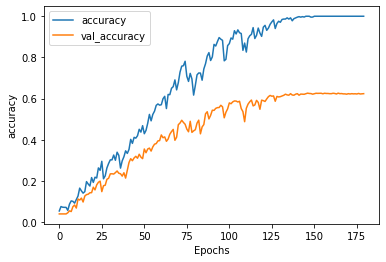

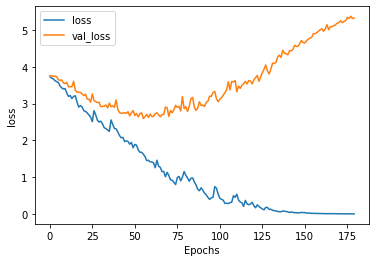

In [14]:
# Visualize the results
# overfit because validation accuracy is slowly dropping while training accuracy is growing
import matplotlib.pyplot as plt
%matplotlib inline

def plot_graphs(history, string):
    plt.plot(history.history[string])
    plt.plot(history.history['val_'+string])
    plt.xlabel("Epochs")
    plt.ylabel(string)
    plt.legend([string, 'val_'+string])
    plt.show()
    
plot_graphs(history, "accuracy")
plot_graphs(history, "loss")

In [15]:
model.save('my.h5')

In [16]:
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 26, 26, 64)        1792      
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 1600)              0         
_________________________________________________________________
dense (Dense)                (None, 64)                102464    
_________________________________________________________________
dense_1 (Dense)              (None, 128)               8